<a href="https://colab.research.google.com/github/danmcode/20223_HMCIA_DMUELAS_examenfina/blob/main/20223_HMCIA_DMUELAS_examenfina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Punto 2. Logistic Regresion

##**Selección del dataset**

Se seleccionar el dataset: [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)


csv: https://raw.githubusercontent.com/danmcode/20223_HMCIA_DMUELAS_examenfina/main/Telco-Customer-Churn.csv



##**Explicación del dataset.**

Los datos de abandono de clientes de Telco contienen información sobre una empresa de telecomunicaciones ficticia que proporcionó servicios de telefonía residencial e Internet a 7043 clientes en California en el tercer trimestre. Indica qué clientes se han ido, se han quedado o se han registrado en su servicio. Se incluyen múltiples datos demográficos importantes para cada cliente, así como un puntaje de satisfacción, un puntaje de abandono y un valor de por vida del cliente (CLTV) independientemente:

`customerID`: ID unico de cada cliente

`gender`: El genero del cliente: (Male, Female)

`SeniorCitizen`: Indica si el cliente tiene una edad igual o mayor de 65 años
(1 o 0)

`Partner`: Indica si el cliente es socio o no (Yes o No) 

`Dependents`: Indica si el cliente tiene dependientes o no ()

`tenure`: Numero de meses en los cuales el usuario ha estado en la compañía.

`PhoneService`: Indica si el cliente tiene servicio de telefonia o no.

`MultipleLines`: Indica si el cliente tiene multiples lineas o no (Yes, No, No Phone Service)

`InternetService`: Proveedor de servicios de internet del proveedor.

`OnlineSecurity`: Indica si el cliente tiene seguridad en linea o no (Yes, No, No Internet Service)

`OnlineBackup`: Si el cliente tiene servicio de backup en linea  dispositivo o no (Yes, No, No internet service)

`DeviceProtection`: Si el cliente tiene protección de dispositivo o no (Yes, No, No internet service)

`TechSupport`: Si el cliente cuenta con soporte técnico o no (Yes, No, No internet service)

`StreamingTV`: Si el cliente tiene el servicio de transmisión de TV (Yes, No, No internet service)

`StreamingMovies`: Indica si el cliente tiene el servicio de peliculas de streaming (Yes, No, No internet service)

`Contract`: Terminos del contrato del cliente (Month-to-month, One year, Two Year)

`PaperlessBilling`: El cliente tiene facturación electronica o no (Yes,No)

`PaymentMethod`: Forma en la que el cliente paga (Electronic check, Mailed Check, Bank transfer(automatic), Credit card (automatic))

`MonthlyCharges`: Monto mensual cargado al cliente.

`TotalCharges`: Monto total cargado al cliente.

`Churn`: Indica si el cliente abandona o no.




### **¿Que se va analizar con el dataset?**

La predicción a realizar es: ¿Cuales clientes abandonaran el servicio de acuerdo a su información?

## **Solución**

### **Importar liberias**

In [ ]:
import pandas as pd
import numpy as np
import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

Función para convertir la columna objetivo a binario ya que los valores son Yes o No

`yes`: 1 \
`No`: 0 

In [ ]:
# 1. Recibir una lista de columnas.
# 2. Recorrer el valor de la columna.
def convert_to_binary(row, column):
  if row['Churn'] == "Yes":
    return 1
  else:
    return 0

###Manejo del dataset
1. Se importa el dataset.
2. se ajustan la columna objetivo a binaria

In [ ]:
# Importar el DataSet.
original_data = pd.read_csv("https://raw.githubusercontent.com/danmcode/20223_HMCIA_DMUELAS_examenfina/main/Telco-Customer-Churn.csv", sep = ',')

'''
Agregar la columna ChurnBinary de acuerdo a los columna,
Churn que no es binaria.
'''
original_data["ChurnBinary"] =  original_data.apply(lambda row: convert_to_binary(
    row, original_data['Churn']), 
    axis=1
    )

edited_data =  original_data.drop(['customerID'], axis=1)

data_columns_list = edited_data.columns.tolist()

for column in data_columns_list:
  print(column)
  #print(edited_data.rows[column])


gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn
ChurnBinary


###**Configurar datos de entrenamiento y de prueba.**

`x_train`: Es el grupo de entrenamiento del resto (80%) 

`x_test`: Es el grupo de prueba del resto (20%).

`y_train`: Es el grupo de entrenamiento de la columna objetivo.

`y_test`:  Es el grupo de prueba de la columna objetivo.

**columna objetivio:** `ChurnBinary`

In [ ]:
x = data.drop(labels='ChurnBinary', axis = 1 )
y = data[['ChurnBinary']]

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
  )

print('x_train', '    y_train')
print(x_train.shape, y_train.shape)
print()
print('x_test', '     y_test')
print(x_train.shape, y_train.shape)

x_train     y_train
(5634, 21) (5634, 1)

x_test      y_test
(5634, 21) (5634, 1)


### **Implementacion de funciones personalizadas para Regresion Logistica Binaria**

In [ ]:
losses = []
train_accuracies = []

#### **Función fit**
Esta función maneja todo el ciclo de entrenamiento. 

1. Hace una transformación ¿?
2. Se realiza los calculos con la función sigmoide.
3. Se realiza el calculo del descenso de gradiente, con la función compute loss
4. Se realiza el uso de la derivada de la perdida. 



In [ ]:
def fit(x, y, epochs):

  global weights, bias
  x = transform_x(x)
  y = transform_y(y)

  # Decide que tan rapido la funcion de activacion será activada
  weights = np.zeros(x.shape[1])

  # Se usa para retrasar la activación de la funcion de activación
  bias = 0

  for i in range(epochs):
    # Calculo de los pesos
    x_dot_weights = np.matmul(weights, x.transpose()) + bias
    
    # Llamado a la función sigmoide
    pred = sigmoid(x_dot_weights)

    # Llamado a la función de perdida
    loss = compute_loss(y, pred)

    # Llamada a la función de gradiente.
    error_w, error_b = compute_gradients(x, y, pred)

    # Actualizar los parametros del modelo
    update_model_parameters(error_w, error_b)

    pred_to_class = [1 if p > 0.5 else 0 for p in pred]
    train_accuracies.append(accuracy_score(y, pred_to_class))
    losses.append(loss)

#### **Función de activación o Función sigmoide**

Para obtener la predicción se debe utilizar la función de activación.

In [ ]:
def sigmoid(x):
  return np.array([sigmoid_function(value) for value in x])

def sigmoid_function(x):
  if x >= 0:  
    z = np.exp(-x)
    return 1 / (1 + z)
  else:
    z = np.exp(x)
    return z / (1 + z)

#### **Función descenso de gradiente**

Que se utiliza para actualizar los parametros del modelo. 

Empieza calculando la diferencia (Cuanto predijo mal el modelo) lueego la utiliza para calcular los gradientes de los sesfos para encontrar un error promedio.

*TODO: Investigar desesnso de gradiente estocastico*

In [ ]:
def compute_gradients(x, y_true, y_pred):
  # derivative of binary cross entropy
  difference =  y_pred - y_true
  gradient_b = np.mean(difference)
  gradients_w = np.matmul(x.transpose(), difference)
  gradients_w = np.array([np.mean(grad) for grad in gradients_w])

  return gradients_w, gradient_b

####**Función de perdida**

También conocida como función de costo, es una función que se usa para medir cuanto difiere la predicción de los valores reales.

Esencialmente, está encontrando todos los errores al comparar su verdad básica  `y_true` con sus predicciones `y_pred`

In [ ]:
def compute_loss(y_true, y_pred):
  # binary cross entropy
  y_zero_loss = y_true * np.log(y_pred + 1e-9)
  y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
  return -np.mean(y_zero_loss + y_one_loss)

#### **Actualización de los parametros del modelo**
Una vez se han calculado los gradientes, se deben actualizar los pesos para la siguiente iteración y que este pueda aprender de los proximos errores.

In [ ]:
def update_model_parameters(error_w, error_b):
  weights = weights - 0.1 * error_w
  bias = bias - 0.1 * error_b

#### **Función predict**
Genera una puntuación de precisión a partir del modelo de regresión logistica personalizada.

In [ ]:

def predict(x):
  x_dot_weights = np.matmul(x, weights.transpose()) + bias
  probabilities = sigmoid(x_dot_weights)
  return [1 if p > 0.5 else 0 for p in probabilities]

#### Copias de los datos

In [ ]:
def transform_x(x):
  x = copy.deepcopy(x)
  return x.values

def transform_y(y):
  y = copy.deepcopy(y)
  return y.values.reshape(y.shape[0], 1)

In [ ]:
x_train
#custom_result = fit(x_train, y_train, epochs = 150)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1623,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
6074,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
1362,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


#Punto 3. Linear Regresion


## **Selección del data-set**

Se selecciona el dataset: [autompg-dataset](https://www.kaggle.com/datasets/uciml/autompg-dataset)

csv: [auto-mpg](https://raw.githubusercontent.com/danmcode/20223_HMCIA_DMUELAS_examenfina/main/auto-mpg.csv)


### **Explicación del Dataset**

El dataset incluye las especificaciones técnicas de algunos vehículos.  Los datos se refieren al consumo de combustible del ciclo urbano en millas por galón.

`Cylinders`: Es el número de cilindros que tiene el vehículo. 

`Displacement`: Es una medida de longitud pero no se ha especificado muy bien cuales son sus unidades metricas. 

`Horse_power`: Son los caballos de potencia del vehículo. 

`Weight`: Es el peso del Vehículo. 

`Acceleration`: Es la aceleración del vehículo. 

`Model_year`: El año de fabricación del vehículo. 

`Origin`: Origen del vehículo. 






### **¿Que se va ha realizar con el dataset:**

Teniendo en cuenta que `Mpg`: Miles Per Gallon, es nuestra variable dependiente, ya que el objetivo es **predecir el consumo de combustible de un vehiculo de acuerdo a determinadas caracteristicas** 

**Nota:** Se debe tener en cuenta que los valores indican el consumo es decir, que con un galon se recorren menos millas.



##Solución

### **Importar librerias**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#variables to store mean and standard deviation for each feature
mu = []
std = []

### Función para realizar la carga de los conjuntos de datos.

La siguiente función carga los datos, los normaliza y luego traza los puntos de los datos.

Se normaliza por que cuando hay numeros muy grandes pueden generar sesgos en los modelos de aprendizaje automatico.

Finalmente se normaliza para que todas se encuentren en el mismo rango. 



x ->  Columnas que se usan para predecir\
y -> Columna objetivo

In [126]:
def load_data(filename):
  df = pd.read_csv(filename, sep=",")
  df = df.drop(['car name'], axis=1)
  df = df.drop(['origin'], axis=1)
  # print(df)

  data = np.array(df, dtype=float)

  # print("*==========*")
  # print("x: ", data[:,:1],)
  # print( "y: ", data[::,1:8])
  
  plot_data(data[:, 1:8], data[:,:1])
	# normalize(data)
  return data[:,:1], data[:, 1:8]

### Normalizar los datos

La siguiente función normaliza todos los elementos de daros en una columna especifca utilizando la media y la desviación estandar de esos elementos.

La formula que se utiliza es **Normalización de caracteristicas**

$$z = (x - μ) / σ $$

In [127]:
def normalize(data):
	for i in range(0,data.shape[1]-1):
		data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))

### Trazar los datos

In [151]:
def plot_data(x, y):
	plt.xlabel('Displacement')
	plt.ylabel('Miles Per Gallon')
	plt.plot(x[:,1], y, 'bo')
	plt.show()

In [129]:
def h(x,theta):
	return np.matmul(x, theta)

In [130]:
def cost_function(x, y, theta):
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

In [137]:

def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
	m = x.shape[0]
	J_all = []
	
	for _ in range(num_epochs):
		h_x = h(x, theta)
		cost_ = (1/m)*(x.T@(h_x - y))
		theta = theta - (learning_rate)*cost_
		J_all.append(cost_function(x, y, theta))

	return theta, J_all 

In [138]:
def plot_cost(J_all, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, J_all, 'm', linewidth = "5")
	plt.show()

In [139]:
def test(theta, x):
	x[0] = (x[0] - mu[0])/std[0]
	x[1] = (x[1] - mu[1])/std[1]

	y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
	print("Price of house: ", y)

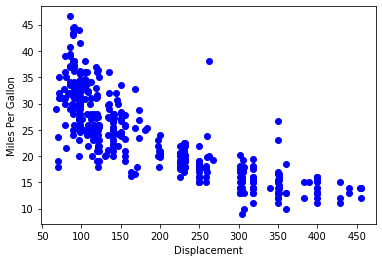

In [153]:
data_set = "https://raw.githubusercontent.com/danmcode/20223_HMCIA_DMUELAS_examenfina/main/auto-mpg.csv"
x,y = load_data(data_set)

# y = np.reshape(y, (46,1))
# x = np.hstack((np.ones((x.shape[0],1)), x))
# theta = np.zeros((x.shape[1], 1))
# learning_rate = 0.1
# num_epochs = 50
# theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
# J = cost_function(x, y, theta)

# print("Cost: ", J)
# print("Parameters: ", theta)

# #for testing and plotting cost 
# n_epochs = []
# jplot = []
# count = 0
# for i in J_all:
# 	jplot.append(i[0][0])
# 	n_epochs.append(count)
# 	count += 1
# jplot = np.array(jplot)
# n_epochs = np.array(n_epochs)
# plot_cost(jplot, n_epochs)

# test(theta, [1600, 3])

#Punto 4. Aplicación de diferenciaciones en redes neuronales.